<a href="https://colab.research.google.com/github/DatumLearning/Mediapipe-playlist/blob/main/instance_segmenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mediapipe

In [ ]:
!wget -O model.tflite -q https://storage.googleapis.com/mediapipe-models/interactive_segmenter/magic_touch/float32/1/magic_touch.tflite

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np
import mediapipe as mp

from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe.tasks.python.components import containers

In [ ]:
RegionOfInterest = vision.InteractiveSegmenterRegionOfInterest
NormalizedKeypoint = containers.keypoint.NormalizedKeypoint

In [ ]:
base_options = python.BaseOptions(model_asset_path='model.tflite')
options = vision.ImageSegmenterOptions(base_options=base_options,
                                       output_category_mask=True)

In [ ]:
x = 0.4
y = 0.5

In [ ]:
with vision.InteractiveSegmenter.create_from_options(options) as segmenter:
  image = mp.Image.create_from_file("/content/dog.jpg")
  roi = RegionOfInterest(format=RegionOfInterest.Format.KEYPOINT,
                           keypoint=NormalizedKeypoint(x, y))
  segmentation_result = segmenter.segment(image, roi)
  category_mask = segmentation_result.category_mask

In [ ]:
BG_COLOR = (192, 192, 192) # gray
MASK_COLOR = (255, 255, 255) # white


In [ ]:
image_data = image.numpy_view()
fg_image = np.zeros(image_data.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR
bg_image = np.zeros(image_data.shape, dtype=np.uint8)
bg_image[:] = BG_COLOR

In [ ]:
condition = np.stack((category_mask.numpy_view(),) * 3, axis=-1) > 0.2
output_image = np.where(condition, fg_image, bg_image)

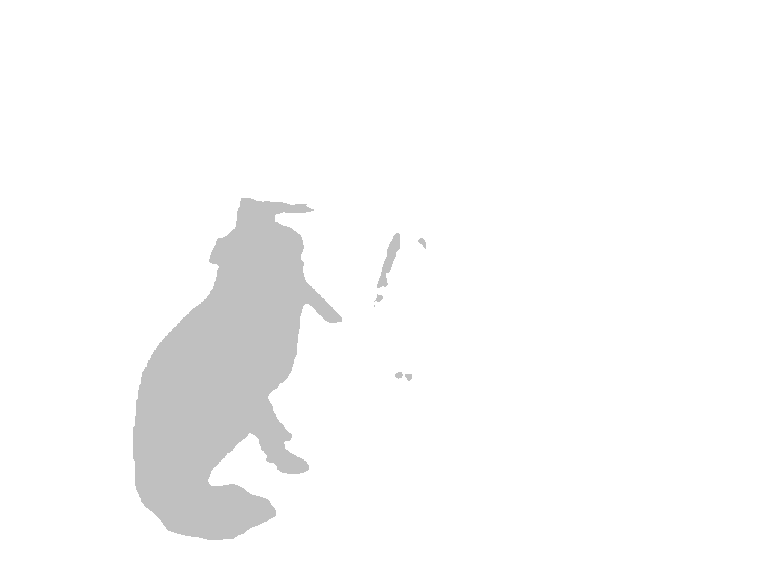

In [ ]:
cv2_imshow(output_image)